In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# http://datamx.io/dataset/delitos-del-fuero-comun
path = 'fuerocomunmunicipios.csv'
df = pd.read_csv(path, encoding='latin', low_memory=False)
df.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551.0
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619.0
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686.0
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604376 entries, 0 to 1604375
Data columns (total 10 columns):
state_code    1604376 non-null int64
mun_code      1604376 non-null int64
year          1604376 non-null int64
month         1604376 non-null int64
crime         1604376 non-null object
category      1604376 non-null object
type          1604375 non-null object
subtype       1604375 non-null object
count         714733 non-null float64
population    1604375 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 122.4+ MB


In [23]:
df.shape

(1604376, 10)

In [24]:
df.shape[0]

1604376

In [25]:
df.shape[1]

10

In [26]:
df.columns.values.tolist()

['state_code',
 'mun_code',
 'year',
 'month',
 'crime',
 'category',
 'type',
 'subtype',
 'count',
 'population']

In [27]:
df.dtypes

state_code      int64
mun_code        int64
year            int64
month           int64
crime          object
category       object
type           object
subtype        object
count         float64
population    float64
dtype: object

In [28]:
df.isnull().any().any()

True

In [29]:
df.columns[df.isnull().any()].tolist()

['type', 'subtype', 'count', 'population']

In [30]:
len(pd.isnull(df).any(1).nonzero()[0].tolist())

/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


889643

In [31]:
pd.isnull(df).any(1).nonzero()[0].tolist()[0:5]

/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


[941, 946, 2661, 2741, 2781]

In [32]:
df.describe()

,state_code,mun_code,year,month,count,population
count,1.604376e+06,1.604376e+06,1.604376e+06,1.604376e+06,714733.000000,1.604375e+06
mean,9.659584e+00,3.701724e+01,2.012177e+03,6.147556e+00,3.252987,7.340194e+04
std,3.293454e+00,2.798403e+01,9.631150e-01,3.502009e+00,23.031864,1.868535e+05
min,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000,1.092000e+03
25%,7.000000e+00,1.300000e+01,2.011000e+03,3.000000e+00,0.000000,1.053200e+04
50%,1.000000e+01,3.200000e+01,2.012000e+03,6.000000e+00,0.000000,2.245100e+04
75%,1.300000e+01,5.700000e+01,2.013000e+03,9.000000e+00,0.000000,5.046400e+04
max,1.400000e+01,1.190000e+02,2.014000e+03,1.200000e+01,1188.000000,1.830454e+06


In [33]:
df.loc[[0]]

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0


In [34]:
df.loc[30:33]

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
30,1,1,2013,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,47.0,842391.0
31,1,1,2013,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,48.0,843374.0
32,1,1,2013,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,39.0,844358.0
33,1,1,2013,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,845341.0


In [35]:
df.drop([0,24,51], axis=0).head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551.0
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619.0
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686.0
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754.0
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822.0


In [36]:
df.drop(df.index[1:5], axis=0).head(10)

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822.0
6,1,1,2011,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,817861.0
7,1,1,2011,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,818900.0
8,1,1,2011,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,36.0,819939.0
9,1,1,2011,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,820978.0
10,1,1,2011,11,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,31.0,822017.0
11,1,1,2011,12,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,27.0,823056.0
12,1,1,2012,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,50.0,824094.0
13,1,1,2012,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,52.0,825133.0


In [37]:
df[100:].head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
100,1,1,2012,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,832319.0
101,1,1,2012,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,833329.0
102,1,1,2012,11,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,834339.0
103,1,1,2012,12,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,835348.0
104,1,1,2013,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,836358.0


In [38]:
df.crime.values

array(['DELITOS PATRIMONIALES', 'DELITOS PATRIMONIALES',
       'DELITOS PATRIMONIALES', ..., 'DELITOS PATRIMONIALES',
       'DELITOS PATRIMONIALES', 'DELITOS PATRIMONIALES'], dtype=object)

In [39]:
df.crime.unique()

array(['DELITOS PATRIMONIALES', 'DELITOS SEXUALES', 'HOMICIDIOS',
       'LESIONES', 'OTROS DELITOS', 'PRIV. DE LA LIBERTAD (SECUESTRO)',
       'ROBOS'], dtype=object)

In [40]:
df.crime.value_counts()

ROBOS                               899470
LESIONES                            194480
HOMICIDIOS                          194444
DELITOS PATRIMONIALES               170192
OTROS DELITOS                        97192
DELITOS SEXUALES                     24300
PRIV. DE LA LIBERTAD (SECUESTRO)     24298
Name: crime, dtype: int64

In [41]:
df.agg(['count', 'size', 'nunique'])

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
count,1604376,1604376,1604376,1604376,1604376,1604376,1604375,1604375,714733,1604375
size,1604376,1604376,1604376,1604376,1604376,1604376,1604376,1604376,1604376,1604376
nunique,14,118,4,12,7,10,18,29,679,19959


In [42]:
df.groupby('state_code').agg(['count', 'size', 'nunique']).stack()

mun_code    year   month   crime  category    type  \
state_code                                                               
1          count       29040   29040   29040   29040     29040   29040   
           size        29040   29040   29040   29040     29040   29040   
           nunique        11       4      12       7        10      18   
2          count       13200   13200   13200   13200     13200   13200   
           size        13200   13200   13200   13200     13200   13200   
           nunique         5       4      12       7        10      18   
3          count       13200   13200   13200   13200     13200   13200   
           size        13200   13200   13200   13200     13200   13200   
           nunique         5       4      12       7        10      18   
4          count       29040   29040   29040   29040     29040   29040   
           size        29040   29040   29040   29040     29040   29040   
           nunique        11       4      12       7        10      18   
5          count      100320  100320  100320  100320    100320  100320   
           size       100320  100320  100320  100320    100320  100320   
           nunique        38       4      12       7        10      18   
6          count       26400   26400   26400   26400     26400   26400   
           size        26400   26400   26400   26400     26400   26400   
           nunique        10       4      12       7        10      18   
7          count      311520  311520  311520  311520    311520  311520   
           size       311520  311520  311520  311520    311520  311520   
           nunique       118       4      12       7        10      18   
8          count      176880  176880  176880  176880    176880  176880   
           size       176880  176880  176880  176880    176880  176880   
           nunique        67       4      12       7        10      18   
9          count       42108   42108   42108   42108     42108   42108   
           size        42108   42108   42108   42108     42108   42108   
           nunique        16       4      12       7        10      18   
10         count      102960  102960  102960  102960    102960  102960   
           size       102960  102960  102960  102960    102960  102960   
           nunique        39       4      12       7        10      18   
11         count      121440  121440  121440  121440    121440  121440   
           size       121440  121440  121440  121440    121440  121440   
           nunique        46       4      12       7        10      18   
12         count      213840  213840  213840  213840    213840  213840   
           size       213840  213840  213840  213840    213840  213840   
           nunique        81       4      12       7        10      18   
13         count      221760  221760  221760  221760    221760  221760   
           size       221760  221760  221760  221760    221760  221760   
           nunique        84       4      12       7        10      18   
14         count      202668  202668  202668  202668    202668  202667   
           size       202668  202668  202668  202668    202668  202668   
           nunique        87       4      12       7        10      18   

                    subtype   count  population  
state_code                                       
1          count      29040   28904       29040  
           size       29040   29040       29040  
           nunique       29     219         440  
2          count      13200    5392       13200  
           size       13200   13200       13200  
           nunique       29     521         200  
3          count      13200   10200       13200  
           size       13200   13200       13200  
           nunique       29     215         200  
4          count      29040   28973       29040  
           size       29040   29040       29040  
           nunique       29      37         439  
5          count     100320   72473      100320  
           si

In [43]:
df.groupby('state_code').agg(['count', 'size', 'nunique'])

mun_code                    year                   month          \
              count    size nunique   count    size nunique   count    size   
state_code                                                                    
1             29040   29040      11   29040   29040       4   29040   29040   
2             13200   13200       5   13200   13200       4   13200   13200   
3             13200   13200       5   13200   13200       4   13200   13200   
4             29040   29040      11   29040   29040       4   29040   29040   
5            100320  100320      38  100320  100320       4  100320  100320   
6             26400   26400      10   26400   26400       4   26400   26400   
7            311520  311520     118  311520  311520       4  311520  311520   
8            176880  176880      67  176880  176880       4  176880  176880   
9             42108   42108      16   42108   42108       4   42108   42108   
10           102960  102960      39  102960  102960       4  102960  102960   
11           121440  121440      46  121440  121440       4  121440  121440   
12           213840  213840      81  213840  213840       4  213840  213840   
13           221760  221760      84  221760  221760       4  221760  221760   
14           202668  202668      87  202668  202668       4  202668  202668   

                     crime  ...    type subtype                   count  \
           nunique   count  ... nunique   count    size nunique   count   
state_code                  ...                                           
1               12   29040  ...      18   29040   29040      29   28904   
2               12   13200  ...      18   13200   13200      29    5392   
3               12   13200  ...      18   13200   13200      29   10200   
4               12   29040  ...      18   29040   29040      29   28973   
5               12  100320  ...      18  100320  100320      29   72473   
6               12   26400  ...      18   26400   26400      29   26400   
7               12  311520  ...      18  311520  311520      29   77854   
8               12  176880  ...      18  176880  176880      29   17750   
9               12   42108  ...      18   42108   42108      29   42072   
10              12  102960  ...      18  102960  102960      29    8578   
11              12  121440  ...      18  121440  121440      29  121436   
12              12  213840  ...      18  213840  213840      29  213837   
13              12  221760  ...      18  221760  221760      29   25553   
14              12  202668  ...      18  202667  202668      29   35311   

                           population                  
              size nunique      count    size nunique  
state_code                                             
1            29040     219      29040   29040     440  
2            13200     521      13200   13200     200  
3            13200     215      13200   13200     200  
4            29040      37      29040   29040     439  
5           100320     216     100320  100320    1482  
6            26400     113      26400   26400     400  
7           311520     123     311520  311520    4505  
8           176880     336     176880  176880    2405  
9            42108     402      42108   42108     635  
10          102960     229     102960  102960    1485  
11          121440     342     121440  121440    1809  
12          213840     244     213840  213840    2949  
13          221760     131     221760  221760    3148  
14          202668     272     202667  202668    2893  

[14 rows x 27 columns]

In [44]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
870923,11,10,2012,4,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,A CASA DE CAMBIO,0.0,11885.0
1580862,14,76,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,SIN VIOLENCIA,NaN,3462.0
412832,7,77,2013,9,OTROS DELITOS,OTROS DELITOS,AMENAZAS,AMENAZAS,0.0,60135.0
1568479,14,70,2012,12,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,CON VIOLENCIA,A CASA DE CAMBIO,0.0,149574.0
778347,10,14,2014,4,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,CON VIOLENCIA,A EMPRESA DE TRASLADO DE VALORES,NaN,35264.0


In [45]:
df.shape

(1604376, 10)

In [46]:
df_sample.shape

(80219, 10)

In [47]:
df_sample.groupby('state_code').agg(['count', 'size', 'nunique']).stack()

mun_code   year  month  crime  category   type  subtype  \
state_code                                                                    
1          count        1436   1436   1436   1436      1436   1436     1436   
           size         1436   1436   1436   1436      1436   1436     1436   
           nunique        11      4     12      7        10     18       29   
2          count         733    733    733    733       733    733      733   
           size          733    733    733    733       733    733      733   
           nunique         5      4     12      7        10     18       29   
3          count         643    643    643    643       643    643      643   
           size          643    643    643    643       643    643      643   
           nunique         5      4     12      7        10     18       29   
4          count        1413   1413   1413   1413      1413   1413     1413   
           size         1413   1413   1413   1413      1413   1413     1413   
           nunique        11      4     12      7        10     18       29   
5          count        4922   4922   4922   4922      4922   4922     4922   
           size         4922   4922   4922   4922      4922   4922     4922   
           nunique        38      4     12      7        10     18       29   
6          count        1288   1288   1288   1288      1288   1288     1288   
           size         1288   1288   1288   1288      1288   1288     1288   
           nunique        10      4     12      7        10     18       29   
7          count       15717  15717  15717  15717     15717  15717    15717   
           size        15717  15717  15717  15717     15717  15717    15717   
           nunique       118      4     12      7        10     18       29   
8          count        8795   8795   8795   8795      8795   8795     8795   
           size         8795   8795   8795   8795      8795   8795     8795   
           nunique        67      4     12      7        10     18       29   
9          count        2003   2003   2003   2003      2003   2003     2003   
           size         2003   2003   2003   2003      2003   2003     2003   
           nunique        16      4     12      7        10     18       29   
10         count        5255   5255   5255   5255      5255   5255     5255   
           size         5255   5255   5255   5255      5255   5255     5255   
           nunique        39      4     12      7        10     18       29   
11         count        6046   6046   6046   6046      6046   6046     6046   
           size         6046   6046   6046   6046      6046   6046     6046   
           nunique        46      4     12      7        10     18       29   
12         count       10709  10709  10709  10709     10709  10709    10709   
           size        10709  10709  10709  10709     10709  10709    10709   
           nunique        81      4     12      7        10     18       29   
13         count       11076  11076  11076  11076     11076  11076    11076   
           size        11076  11076  11076  11076     11076  11076    11076   
           nunique        84      4     12      7        10     18       29   
14         count       10183  10183  10183  10183     10183  10183    10183   
           size        10183  10183  10183  10183     10183  10183    10183   
           nunique        87      4     12      7        10     18       29   

                    count  population  
state_code                             
1          count     1431        1436  
           size      1436        1436  
           nunique     44         427  
2          count      311         733  
           size       733         733  
           nunique    107         193  
3          count      481         643  
           size       643         643  
           nunique     59         192  
4          count     1411        1413  
           size      1413        1413  
           nunique     

Data Transform

In [48]:
df_dropped = df.dropna(subset=['count'])
df_dropped.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551.0
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619.0
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686.0
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754.0


In [49]:
df_dropped.shape

(714733, 10)

In [50]:
df_copy = df.copy()
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551.0
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619.0
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686.0
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754.0


In [51]:
df_copy.shape

(1604376, 10)

In [52]:
df_dropped['count'].dtype

dtype('float64')

In [53]:
df_dropped['count'].mean() 

3.252986779678565

In [54]:
df_copy['count'].fillna(value=np.round(df['count'].mean(),decimals=0), inplace=True)


In [55]:
df_copy.agg(['count', 'size', 'nunique'])

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
count,1604376,1604376,1604376,1604376,1604376,1604376,1604375,1604375,1604376,1604375
size,1604376,1604376,1604376,1604376,1604376,1604376,1604376,1604376,1604376,1604376
nunique,14,118,4,12,7,10,18,29,679,19959


In [56]:
df_sample = df_copy.sample(frac=0.05, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
870923,11,10,2012,4,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,A CASA DE CAMBIO,0.0,11885.0
1580862,14,76,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,SIN VIOLENCIA,3.0,3462.0
412832,7,77,2013,9,OTROS DELITOS,OTROS DELITOS,AMENAZAS,AMENAZAS,0.0,60135.0
1568479,14,70,2012,12,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,CON VIOLENCIA,A CASA DE CAMBIO,0.0,149574.0
778347,10,14,2014,4,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,CON VIOLENCIA,A EMPRESA DE TRASLADO DE VALORES,3.0,35264.0


Handling Categorical Data

In [57]:
list(df.crime.unique())

['DELITOS PATRIMONIALES',
 'DELITOS SEXUALES',
 'HOMICIDIOS',
 'LESIONES',
 'OTROS DELITOS',
 'PRIV. DE LA LIBERTAD (SECUESTRO)',
 'ROBOS']

In [58]:
keys = list(df.crime.unique())
vals = range(1,8)
crime_map = dict(zip(keys, vals))
crime_map

{'DELITOS PATRIMONIALES': 1,
 'DELITOS SEXUALES': 2,
 'HOMICIDIOS': 3,
 'LESIONES': 4,
 'OTROS DELITOS': 5,
 'PRIV. DE LA LIBERTAD (SECUESTRO)': 6,
 'ROBOS': 7}

In [59]:
df_copy['crime_cat'] = df.crime.map(crime_map)
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population,crime_cat
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0,1
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551.0,1
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619.0,1
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686.0,1
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754.0,1


In [60]:
list(df_copy.crime_cat.unique())

[1, 2, 3, 4, 5, 6, 7]

Normalizing Values

In [61]:
from sklearn import preprocessing

df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['population'].values.reshape(-1,1))
df_normalized['population_norm'] = np_scaled.reshape(-1,1)
df_normalized.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population,population_norm
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483.0,0.442991
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551.0,0.443575
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619.0,0.444159
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686.0,0.444742
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754.0,0.445326


Data Summarization

In [62]:
df['state_code'].mean()

9.659583539020778

In [63]:
df['state_code'][df['month'] == 1].mean()

9.575681341719077

In [64]:
df.groupby(['state_code', 'year']).count()

mun_code  month  crime  category   type  subtype  count  \
state_code year                                                            
1          2011      8712   8712   8712      8712   8712     8712   8708   
           2012      8712   8712   8712      8712   8712     8712   8585   
           2013      8712   8712   8712      8712   8712     8712   8708   
           2014      2904   2904   2904      2904   2904     2904   2903   
2          2011      3960   3960   3960      3960   3960     3960   1500   
           2012      3960   3960   3960      3960   3960     3960   1739   
           2013      3960   3960   3960      3960   3960     3960   1512   
           2014      1320   1320   1320      1320   1320     1320    641   
3          2011      3960   3960   3960      3960   3960     3960   3960   
           2012      3960   3960   3960      3960   3960     3960   3960   
           2013      3960   3960   3960      3960   3960     3960   1660   
           2014      1320   1320   1320      1320   1320     1320    620   
4          2011      8712   8712   8712      8712   8712     8712   8646   
           2012      8712   8712   8712      8712   8712     8712   8712   
           2013      8712   8712   8712      8712   8712     8712   8711   
           2014      2904   2904   2904      2904   2904     2904   2904   
5          2011     30096  30096  30096     30096  30096    30096  21143   
           2012     30096  30096  30096     30096  30096    30096  20524   
           2013     30096  30096  30096     30096  30096    30096  23218   
           2014     10032  10032  10032     10032  10032    10032   7588   
6          2011      7920   7920   7920      7920   7920     7920   7920   
           2012      7920   7920   7920      7920   7920     7920   7920   
           2013      7920   7920   7920      7920   7920     7920   7920   
           2014      2640   2640   2640      2640   2640     2640   2640   
7          2011     93456  93456  93456     93456  93456    93456   7211   
           2012     93456  93456  93456     93456  93456    93456   6905   
           2013     93456  93456  93456     93456  93456    93456  53172   
           2014     31152  31152  31152     31152  31152    31152  10566   
8          2011     53064  53064  53064     53064  53064    53064   5636   
           2012     53064  53064  53064     53064  53064    53064   5243   
           2013     53064  53064  53064     53064  53064    53064   5220   
           2014     17688  17688  17688     17688  17688    17688   1651   
9          2011     12672  12672  12672     12672  12672    12672  12655   
           2012     12672  12672  12672     12672  12672    12672  12672   
           2013     12540  12540  12540     12540  12540    12540  12540   
           2014      4224   4224   4224      4224   4224     4224   4205   
10         2011     30888  30888  30888     30888  30888    30888   2555   
           2012     30888  30888  30888     30888  30888    30888   2532   
           2013     30888  30888  30888     30888  30888    30888   2644   
           2014     10296  10296  10296     10296  10296    10296    847   
11         2011     36432  36432  36432     36432  36432    36432  36428   
           2012     36432  36432  36432     36432  36432    36432  36432   
           2013     36432  36432  36432     36432  36432    36432  36432   
           2014     12144  12144  12144     12144  12144    12144  12144   
12         2011     64152  64152  64152     64152  64152    64152  64149   
           2012     64152  64152  64152     64152  64152    64152  64152   
           2013     64152  64152  64152     64152  64152    64152  64152   
           2014     21384  21384  21384     21384  21384    21384  21384   
13         2011     66528  66528  66528     66528  66528    66528   8796   
           2012     66528  66528  66528     66528  66528    66528   6495   
           2013     66528  66528  66528     66528  66528    66528

In [65]:
df.groupby(['state_code', 'year']).count()

mun_code  month  crime  category   type  subtype  count  \
state_code year                                                            
1          2011      8712   8712   8712      8712   8712     8712   8708   
           2012      8712   8712   8712      8712   8712     8712   8585   
           2013      8712   8712   8712      8712   8712     8712   8708   
           2014      2904   2904   2904      2904   2904     2904   2903   
2          2011      3960   3960   3960      3960   3960     3960   1500   
           2012      3960   3960   3960      3960   3960     3960   1739   
           2013      3960   3960   3960      3960   3960     3960   1512   
           2014      1320   1320   1320      1320   1320     1320    641   
3          2011      3960   3960   3960      3960   3960     3960   3960   
           2012      3960   3960   3960      3960   3960     3960   3960   
           2013      3960   3960   3960      3960   3960     3960   1660   
           2014      1320   1320   1320      1320   1320     1320    620   
4          2011      8712   8712   8712      8712   8712     8712   8646   
           2012      8712   8712   8712      8712   8712     8712   8712   
           2013      8712   8712   8712      8712   8712     8712   8711   
           2014      2904   2904   2904      2904   2904     2904   2904   
5          2011     30096  30096  30096     30096  30096    30096  21143   
           2012     30096  30096  30096     30096  30096    30096  20524   
           2013     30096  30096  30096     30096  30096    30096  23218   
           2014     10032  10032  10032     10032  10032    10032   7588   
6          2011      7920   7920   7920      7920   7920     7920   7920   
           2012      7920   7920   7920      7920   7920     7920   7920   
           2013      7920   7920   7920      7920   7920     7920   7920   
           2014      2640   2640   2640      2640   2640     2640   2640   
7          2011     93456  93456  93456     93456  93456    93456   7211   
           2012     93456  93456  93456     93456  93456    93456   6905   
           2013     93456  93456  93456     93456  93456    93456  53172   
           2014     31152  31152  31152     31152  31152    31152  10566   
8          2011     53064  53064  53064     53064  53064    53064   5636   
           2012     53064  53064  53064     53064  53064    53064   5243   
           2013     53064  53064  53064     53064  53064    53064   5220   
           2014     17688  17688  17688     17688  17688    17688   1651   
9          2011     12672  12672  12672     12672  12672    12672  12655   
           2012     12672  12672  12672     12672  12672    12672  12672   
           2013     12540  12540  12540     12540  12540    12540  12540   
           2014      4224   4224   4224      4224   4224     4224   4205   
10         2011     30888  30888  30888     30888  30888    30888   2555   
           2012     30888  30888  30888     30888  30888    30888   2532   
           2013     30888  30888  30888     30888  30888    30888   2644   
           2014     10296  10296  10296     10296  10296    10296    847   
11         2011     36432  36432  36432     36432  36432    36432  36428   
           2012     36432  36432  36432     36432  36432    36432  36432   
           2013     36432  36432  36432     36432  36432    36432  36432   
           2014     12144  12144  12144     12144  12144    12144  12144   
12         2011     64152  64152  64152     64152  64152    64152  64149   
           2012     64152  64152  64152     64152  64152    64152  64152   
           2013     64152  64152  64152     64152  64152    64152  64152   
           2014     21384  21384  21384     21384  21384    21384  21384   
13         2011     66528  66528  66528     66528  66528    66528   8796   
           2012     66528  66528  66528     66528  66528    66528   6495   
           2013     66528  66528  66528     66528  66528    66528

In [66]:
df.groupby(['category', 'year'])[['crime', 'mun_code']].count()

crime  mun_code
category                         year                  
DELITOS PATRIMONIALES            2011   51492     51492
                                 2012   51876     51876
                                 2013   51858     51858
                                 2014   14966     14966
DELITOS SEXUALES (VIOLACION)     2011    7356      7356
                                 2012    7404      7404
                                 2013    7402      7402
                                 2014    2138      2138
HOMICIDIOS                       2011   58908     58908
                                 2012   59232     59232
                                 2013   59216     59216
                                 2014   17088     17088
LESIONES                         2011   58944     58944
                                 2012   59232     59232
                                 2013   59216     59216
                                 2014   17088     17088
OTROS DELITOS                    2011   29424     29424
                                 2012   29616     29616
                                 2013   29608     29608
                                 2014    8544      8544
PRIV. DE LA LIBERTAD (SECUESTRO) 2011    7356      7356
                                 2012    7404      7404
                                 2013    7402      7402
                                 2014    2136      2136
ROBO COMUN                       2011  103152    103152
                                 2012  103656    103656
                                 2013  103628    103628
                                 2014   29904     29904
ROBO DE GANADO (ABIGEATO)        2011    7368      7368
                                 2012    7404      7404
                                 2013    7402      7402
                                 2014    2136      2136
ROBO EN CARRETERAS               2011   73680     73680
                                 2012   74040     74040
                                 2013   74020     74020
                                 2014   21360     21360
ROBO EN INSTITUCIONES BANCARIAS  2011   88416     88416
                                 2012   88848     88848
                                 2013   88824     88824
                                 2014   25632     25632

In [67]:
# variant-1: multiple aggregations on single attribute
df_sample.groupby(['category', 'year'])[['crime', 'mun_code']].agg([np.sum, np.mean,
                                                              np.count_nonzero])

mun_code                         
                                           sum       mean count_nonzero
category                         year                                  
DELITOS PATRIMONIALES            2011    96148  37.734694          2548
                                 2012    96070  37.078348          2591
                                 2013    94142  37.210277          2530
                                 2014    24454  35.135057           696
DELITOS SEXUALES (VIOLACION)     2011    11820  34.764706           340
                                 2012    14993  39.981333           375
                                 2013    12263  34.838068           352
                                 2014     3865  35.136364           110
HOMICIDIOS                       2011   109332  36.812121          2970
                                 2012   107518  36.833847          2919
                                 2013   109063  36.709189          2971
                                 2014    31311  35.621160           879
LESIONES                         2011   114324  37.930989          3014
                                 2012   108679  36.802912          2953
                                 2013   109694  36.909152          2972
                                 2014    28038  35.267925           795
OTROS DELITOS                    2011    55996  36.766907          1523
                                 2012    55947  37.573539          1489
                                 2013    50533  35.636812          1418
                                 2014    16141  38.987923           414
PRIV. DE LA LIBERTAD (SECUESTRO) 2011    13836  37.803279           366
                                 2012    12035  35.606509           338
                                 2013    14875  39.041995           381
                                 2014     3390  38.965517            87
ROBO COMUN                       2011   198540  37.538287          5289
                                 2012   198974  37.907030          5249
                                 2013   194243  37.695129          5153
                                 2014    51857  36.011806          1440
ROBO DE GANADO (ABIGEATO)        2011    11933  34.094286           350
                                 2012    15175  37.285012           407
                                 2013    14103  34.822222           405
                                 2014     4085  34.914530           117
ROBO EN CARRETERAS               2011   131478  36.189926          3633
                                 2012   138466  37.112302          3731
                                 2013   140477  37.222311          3774
                                 2014    36298  36.443775           996
ROBO EN INSTITUCIONES BANCARIAS  2011   164261  36.929182          4448
                                 2012   162760  37.032992          4395
                                 2013   169138  37.602935          4498
                                 2014    46770  35.894091          1303

In [68]:
# variant-2: different aggregation functions for each attribute
df_sample.groupby(['category', 'year']).agg({'month':np.mean,'population':np.max})

month  population
category                         year                      
DELITOS PATRIMONIALES            2011  6.382653   1830454.0
                                 2012  6.492860   1820658.0
                                 2013  6.576285   1813092.0
                                 2014  2.472701   1807532.0
DELITOS SEXUALES (VIOLACION)     2011  6.461765   1830454.0
                                 2012  6.405333   1185359.0
                                 2013  6.568182   1810597.0
                                 2014  2.536364    897963.0
HOMICIDIOS                       2011  6.507407   1826952.0
                                 2012  6.528263   1821335.0
                                 2013  6.430158   1813092.0
                                 2014  2.477816   1807094.0
LESIONES                         2011  6.549436   1830454.0
                                 2012  6.526583   1821335.0
                                 2013  6.461306   1813092.0
                                 2014  2.467925   1807970.0
OTROS DELITOS                    2011  6.670387   1827828.0
                                 2012  6.537945   1815790.0
                                 2013  6.312412   1813631.0
                                 2014  2.536232   1689914.0
PRIV. DE LA LIBERTAD (SECUESTRO) 2011  6.661202   1614057.0
                                 2012  6.642012   1819303.0
                                 2013  6.409449   1402854.0
                                 2014  2.459770   1499737.0
ROBO COMUN                       2011  6.484591   1829579.0
                                 2012  6.501238   1819303.0
                                 2013  6.528236   1814171.0
                                 2014  2.480556   1692086.0
ROBO DE GANADO (ABIGEATO)        2011  6.485714   1505514.0
                                 2012  6.407862   1818625.0
                                 2013  6.441975   1811473.0
                                 2014  2.504274    628337.0
ROBO EN CARRETERAS               2011  6.483072   1828703.0
                                 2012  6.470383   1819980.0
                                 2013  6.510334   1812013.0
                                 2014  2.476908   1807970.0
ROBO EN INSTITUCIONES BANCARIAS  2011  6.452788   1830454.0
                                 2012  6.446416   1821335.0
                                 2013  6.630502   1814171.0
                                 2014  2.464313   1807970.0

In [69]:
# variant-3
df_sample.groupby(['category', 'year']).agg({'population':{'total_population':np.sum,
                                                               'mean_population':np.mean,
                                                               'variance_population':np.std},
                                                               'month':np.mean})

/home/vagrant/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


population                  \
                                      total_population mean_population   
category                         year                                    
DELITOS PATRIMONIALES            2011      176173383.0    69141.830063   
                                 2012      186244574.0    71881.348514   
                                 2013      180542313.0    71360.598024   
                                 2014       55833591.0    80220.676724   
DELITOS SEXUALES (VIOLACION)     2011       24581615.0    72298.867647   
                                 2012       24982692.0    66620.512000   
                                 2013       25603078.0    72736.017045   
                                 2014        8538994.0    77627.218182   
HOMICIDIOS                       2011      208311154.0    70138.435690   
                                 2012      204592272.0    70089.849949   
                                 2013      214378205.0    72156.918546   
                                 2014       71347106.0    81168.493743   
LESIONES                         2011      211378443.0    70132.197412   
                                 2012      217743131.0    73736.244836   
                                 2013      216873990.0    72972.405787   
                                 2014       64358129.0    80953.621384   
OTROS DELITOS                    2011      116316966.0    76373.582403   
                                 2012      103517919.0    69521.772330   
                                 2013      100115515.0    70603.325106   
                                 2014       33747213.0    81515.007246   
PRIV. DE LA LIBERTAD (SECUESTRO) 2011       27390488.0    74837.398907   
                                 2012       27621777.0    81721.233728   
                                 2013       25763701.0    67621.262467   
                                 2014        6969346.0    80107.425287   
ROBO COMUN                       2011      376833475.0    71248.529968   
                                 2012      384544497.0    73260.525243   
                                 2013      372586253.0    72304.725985   
                                 2014      124080050.0    86166.701389   
ROBO DE GANADO (ABIGEATO)        2011       22844544.0    65270.125714   
                                 2012       31579132.0    77590.004914   
                                 2013       31392917.0    77513.375309   
                                 2014        5348199.0    45711.102564   
ROBO EN CARRETERAS               2011      259983830.0    71561.747867   
                                 2012      254585340.0    68235.148754   
                                 2013      275594744.0    73024.574457   
                                 2014       85613613.0    85957.442771   
ROBO EN INSTITUCIONES BANCARIAS  2011      326391242.0    73379.325989   
                                 2012      331561432.0    75440.598862   
                                 2013      343630387.0    76396.262116   
                                 2014      101092879.0    77584.711435   

                                                              month  
                                      variance_population      mean  
category                         year                                
DELITOS PATRIMONIALES            2011       188208.825005  6.382653  
                                 2012       185380.247000  6.492860  
                                 2013       175544.549302  6.576285  
                                 2014       201029.638468  2.472701  
DELITOS SEXUALES (VIOLACION)     2011       217090.581336  6.461765  
                                 2012       153157.621851  6.405333  
                                 2013       190040.761815  6.568182  
                                 2014       147887.855087  2.536364  
HOMICIDIOS                       2011       175328.411451  6.507407  
                     

Data Visualization

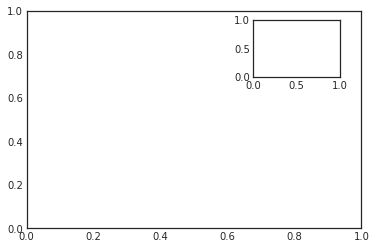

In [70]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

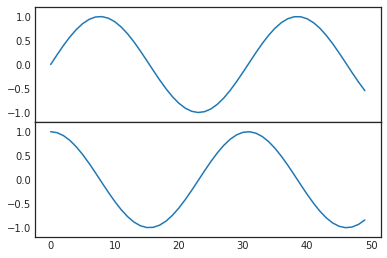

In [71]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

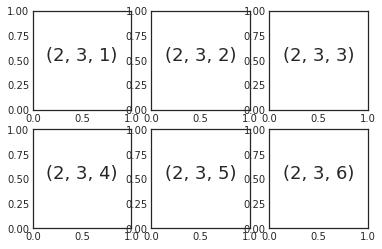

In [72]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

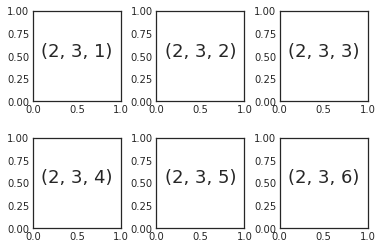

In [73]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

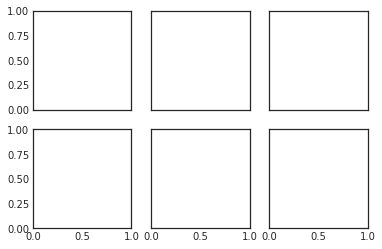

In [74]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

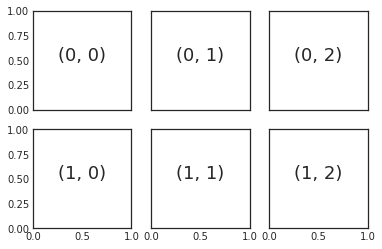

In [75]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

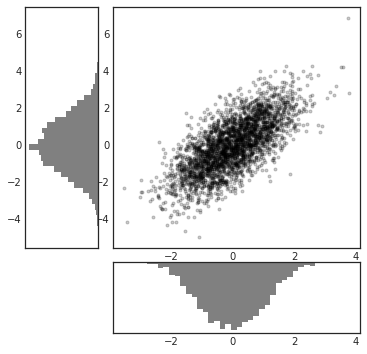

In [76]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

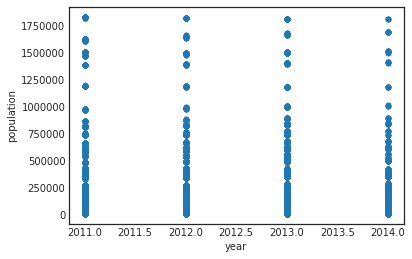

In [77]:
df_sample['year'] = df_sample['year'].astype('int64')

df_sample.plot(kind='scatter',x='year',y='population')

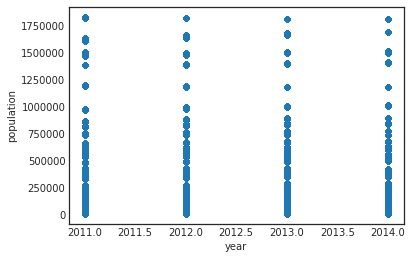

In [78]:
df_copy.plot(kind='scatter',x='year',y='population')

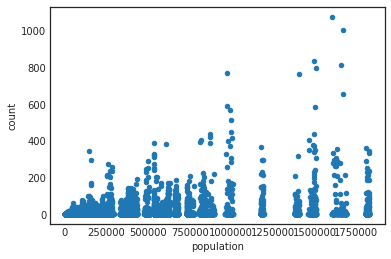

In [79]:
df_sample.plot(kind='scatter',x='population',y='count')

In [ ]:
#plt.boxplot(df_sample['crime_cat'])
plt.boxplot(df_sample['month'], showmeans=True, meanline=True)
plt.ylabel('Crime categories')
plt.title('Box Plot of Crime categories')